In [24]:
import numpy as np
Value = np.array([[1,2,3,4],[2,5,6,7],[8,9,10,11],[12,13,14,15]])

Value1 = np.array([1])

Value2 = np.array([3,3,3,3])

Value3 = np.array([4,5,6,7]).reshape(4,1)

print(Value + Value1) #4x4 + 1

print(Value + Value2) #4x4 + 1x4

print(Value2 + Value3) #1x4 + 4x1 이 경우에만 양 축에 맞추어서 새로운 배열이 생성된다.


[[ 2  3  4  5]
 [ 3  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]
[[ 4  5  6  7]
 [ 5  8  9 10]
 [11 12 13 14]
 [15 16 17 18]]
[[ 7  7  7  7]
 [ 8  8  8  8]
 [ 9  9  9  9]
 [10 10 10 10]]


브로드캐스팅은 일정 조건을 부합하는 다른 형태의 배열끼리 연산을 수행한다.<br>
- 멤버가 하나인 배열은 어떤 배열에나 브로드캐스팅이 가능하다.
 - ex) 4X4 + 1
- 하나의 배열의 차원이 1인경우 브로드캐스팅이 가능하다.
 - ex) 4X4 + 1X4
- 차원의 짝이 맞을 때 브로드캐스팅 가능
 - ex) 3X1 + 1X3


# 2. 퍼셉트론
## 퍼셉트론이란?
* 퍼셉트론은 다수의 신호를 입력으로 받아 하나의 신호로 출력.
* 책에서는 신호가 흐른다 1, 신호가 흐르지 않는다 0 으로 표현

# 퍼셉트론 구현(AND)

In [5]:
def AND(x1, x2):
  w1,  w2, theta = 0.5, 0.5, 0.7
  temp = x1*w1 +x2*w2
  if temp <= theta:
    return 0
  elif temp > theta:
    return 1

AND(0,0)
AND(1,0)
AND(0,1)
AND(1,1)

1

## 가중치와 편향 도입

In [6]:
x = np.array([0,1]) #입력
w = np.array([0.5, 0.5]) #가중치
b = -0.7 #편향

w*x #각 원소끼리 더했다

array([0. , 0.5])

퍼셉트론은 **입력 신호에 가중치를 곱한 값 과 편향을 합하**여, 그 값이 0을 넘으면 1을 출력하고 그렇지 않으면 0을 출력한다.

In [8]:
np.sum(w*x) #원소의 총 합을 계산

0.5

In [9]:
np.sum(w*x) + b #가중치 합산

-0.19999999999999996

대략 -0.2 (부동소수점 수에 의한 연산 오차)

# 가중치(weight)와 편향(bias) 구현

In [15]:
def AND_b(x1, x2):
  x = np.array([x1, x2])
  w = np.array([0.5, 0.5])
  b = -0.7
  temp = np.sum(w*x)+b # 원소의 총 합에 가중치를 합산
  if temp <= 0:
    return 0
  else:
    return 1

AND_b(1, 1)

1

* w1과 w2는 입력 신호가 결과에 주는 영향력(중요도)를 조절하는 매개변수.
* 편향은 뉴런이 얼마나 쉽게 활성화 하느냐를 조정하는 매개변수.<br>
ex) if 편향 = -1,<br> 입력신호 * 가중치의 합이 0.1을 초과할 때 뉴런 활성화
* 현재는 w를 가중치로 b를 편향으로 구별하지만, 문맥에 따라 셋 모두를 '가중치'라고 표현할 때도 존재

In [18]:
def NAND(x1, x2):
  x = np.array([x1,x2])
  w = np.array([-0.5,-0.5])
  b = 0.7
  temp = np.sum(w*x)+b # 원소의 총 합에 가중치를 합산
  if temp <= 0:
    return 0
  else:
    return 1

def OR(x1, x2):
  x = np.array([x1,x2])
  w = np.array([0.5,0.5]) #AND와는 가중치만 상이하다.
  b = -0.2
  temp = np.sum(w*x)+b # 원소의 총 합에 가중치를 합산
  if temp <= 0:
    return 0
  else:
    return 1

* AND, NAND, OR 모두 같은 구조의 퍼셉트론임을 확인.
* 논리연산의 차이를 두는 곳은 가중치, 매개변수의 값

## 퍼셉트론의 한계
* XOR 게이트(배타적 논리합)에 대하여 생각해보자<br>
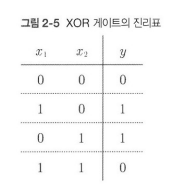

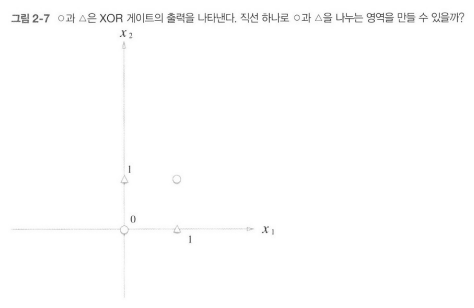
<br>
* XOR 게이트의 출력을 나타낸 그래프이다.
* 위 값들을 직선 하나로 나누는 방법은 없다.<br>
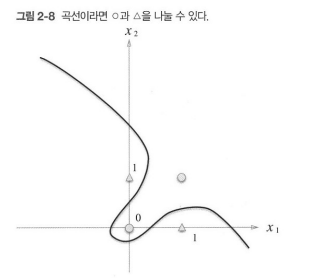

* 비선형 영역으로 나눠야한다.
* 층을 쌓아 다층 퍼셉트론(multi-layer perceptron)을 만들어서 표현할 수 있다.
=단층 퍼셉트론으로는 비선형 영역을 분리할 수 없다.

## 기존 게이트를 조합하여 XOR게이트 만들기

* AND, NAND, OR을 조합하여 XOR를 만들 수 있다. <br>
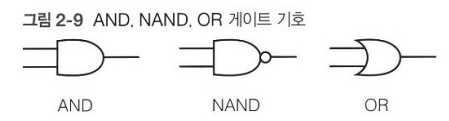


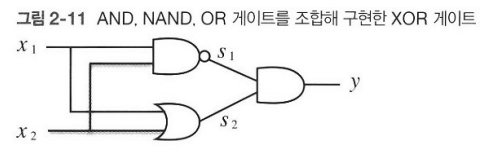

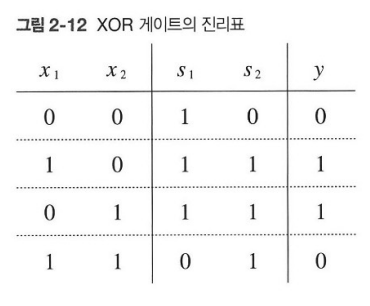

In [19]:
def XOR(x1, x2):
  s1 = NAND(x1, x2)
  s2 = OR(x1, x2)
  y = AND_b(s1,s2)
  return y

In [20]:
XOR(0,0)

0

In [21]:
XOR(1,0)

1

In [22]:
XOR(0,1)

1

In [23]:
XOR(1,1)

0

기대한 대로 XOR게이트의 값을 출력했다.

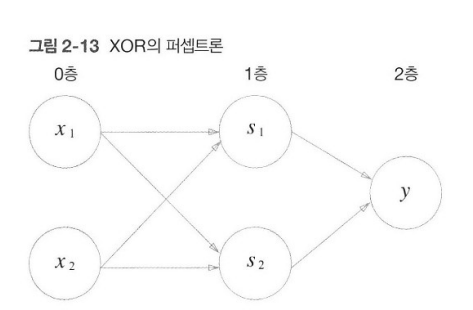
* XOR 그림으로 표현하자면 다음과 같은 다층 구조의 네트워크이다.
* XOR는 2층 퍼셉트론으로 구성.
* 동작을 살펴보면 아래와 같다
 1. 0층의 두 뉴련이 입력신호를 받아 1층의 뉴런으로 신호를 보낸다.
 2. 1층의 뉴런이 2층의 뉴런으로 신호를 보내고, 2층의 뉴런은 y를 출력한다.

- 단층 퍼셉트론으로 표현하지 못한 것을 층을 하나 늘려 구현할 수 있다.

# 정리

- 퍼셉트론은 입출력을 갖춘 알고리즘이다. 입력 > 규칙에 따른 값 출력
- 가중치와 편향을 매개변수로 설정.(가중치와 편향을 모두 합하여 매개변수로 칭하기도 한다)
- 단층 퍼셉트론으로 AND, OR, NAND 게이트의 논리회로를 표현할 수 있다.
- XOR 게이트는 다층 구조의 퍼셉트론으로 구현 가능하다. (AND, OR, NAND 조합)
- 단층 퍼셉트론은 직선형 영역, 다층 퍼셉트론은 비선형 영역 표현 가능.
- 다층 퍼셉트론은 컴퓨터를 표현할 수 있다.